In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [67]:
# Functions

def smart_randomizer(parts_num: dict, Shape: int): #initially requires parts dict, but in fact only number of particles is needed
    coords2 = set()
    parts = {}
    j = 0
    while len(coords2) != parts_num:
        coords2.add((random.randint(1, Shape), random.randint(1, Shape)))
    for i in coords2:
        j += 1
        parts.update({'part'+str(j): i})
    return parts


def dist(part1, part2):  
    return np.sqrt((part1[0] - part2[0])**2 + (part1[1] - part2[1])**2)

def pot_calc(parts):
    a = [] # matrix of inverse distances of old configuration
    for i in parts:
        c = [] # generate an empty list to append it to a after filling
        for j in parts:
            if i == j:
                c.append(0)
            else:
                c.append(1/dist(parts[i], parts[j]))
        a.append(c)
    pot = np.sum(np.array(a))/2
    return pot*(-1)

def jump_estimator(parts1, parts2, Temp):
    # deltaE = pot_calc(parts2) - pot_calc(parts1)
    if Temp == 0:
        if (pot_calc(parts2)-pot_calc(parts1)) < 0:
            return True
        else: 
            return False
    else:
        Prob = np.exp((pot_calc(parts1)-pot_calc(parts2))/Temp)
        u = random.uniform(0,1)
        if u <= Prob:
            return True
        else:
            return False


In [148]:
# с тремя строчками ниже можно играться:

iterations = 5000 # number of iterations (test)
shp = 10 # shape of the lattice
Parts_num = 9 # number of particles
Temp = 0.05

particles_init = smart_randomizer(Parts_num, shp)
print(pot_calc(particles_init))
coords_path = []
part_now = particles_init
coords_path.append(particles_init)
i = 0
energy_arr = []
with open('out.txt', 'w') as outfile:
    outfile.write(f'INITIAL: {particles_init} \n')
    while i <= iterations:
        i += 1
        part_rand = smart_randomizer(Parts_num, shp)
        if jump_estimator(part_now, part_rand, Temp) == True:
            outfile.write(f'NEW: {part_rand} \nENERGY: {pot_calc(part_rand)} \nJUMP? {jump_estimator(part_now, part_rand, Temp)} \n')
            part_now = part_rand
        else:
            outfile.write(f'NEW: {part_rand} \nENERGY: {pot_calc(part_rand)} \nJUMP? {jump_estimator(part_now, part_rand, Temp)} \n')

        energy_arr.append(pot_calc(part_now)) 
        coords_path.append(part_now)
print(pot_calc(part_now))


-8.944183665192142
-15.65492753356822


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(13, 6), sharey=True, sharex=False)

for i in particles_init.values():
    ax[0].plot(i[0], i[1], 'o', color='red')
    ax[0].set_ylim(0, shp+1)
    ax[0].set_xlim(0, shp+1)
    ax[0].set_title('Before MC')
    ax[0].set_xticks(np.arange(0, shp+1, 1))
    ax[0].set_yticks(np.arange(0, shp+1, 1))
for i in part_now.values():
    ax[1].plot(i[0], i[1], 'o', color='red')
    ax[1].set_ylim(0, shp+1)
    ax[1].set_xlim(0, shp+1)
    ax[1].set_title('After MC')
    ax[1].set_xticks(np.arange(0, shp+1, 1))
    ax[1].set_yticks(np.arange(0, shp+1, 1))
ax[0].grid()
ax[1].grid()
plt.show()

In [ ]:
plt.plot(energy_arr)
print(len(energy_arr))
plt.show()

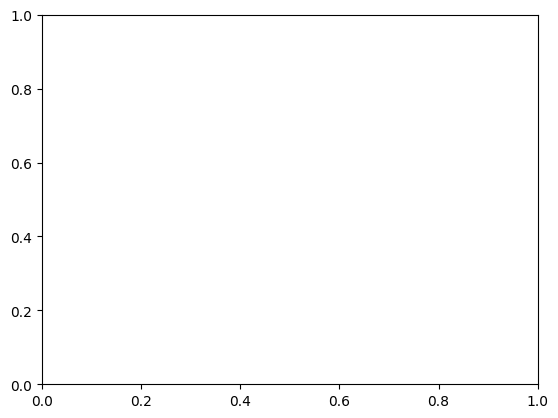

In [149]:
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = plt.axes()

def animate(i):
    ax.plot(coords_path[i][0], coords_path[i][1], 'o', color='red')

ani = FuncAnimation(fig, animate, frames=iterations, interval=50)
plt.show()
